<a href="https://colab.research.google.com/github/utpalrtw/git-practive/blob/master/SMS_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Importing Library**



In [7]:
import numpy as np
import pandas as pd

In [8]:
data = pd.read_csv('spam.csv', encoding='latin-1')

[Link of dataset: ]{https://drive.google.com/file/d/1kfU-b5GmDE8IwMalJZHXralh4IUo4gQ9/view?usp=drive_link}

In [9]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
data.shape #shape of data

(5572, 5)

## Data Cleaning

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


We don't get much information from last three columns, so we drop last three columns. and rename v1 and v2 columns.

In [12]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [13]:
#renaming v1 & v2
data.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace=True)
data.sample(5)

,Target,Text
4470,ham,Wa... U so efficient... Gee... Thanx...
2031,ham,"I noe la... U wana pei bf oso rite... K lor, o..."
730,spam,Email AlertFrom: Jeri StewartSize: 2KBSubject:...
1418,ham,Lmao. Take a pic and send it to me.
259,ham,IÛ÷m parked next to a MINI!!!! When are you c...


In [14]:
#encoding Target column into 0, 1 lable (ham = 0, spam = 1)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Target'] = encoder.fit_transform(data['Target'])

In [15]:
data.sample(5)

,Target,Text
4326,0,Dude got a haircut. Now its breezy up there
1502,0,Don no da:)whats you plan?
631,0,Thank u!
5387,0,I will be gentle baby! Soon you will be taking...
1073,0,Lul im gettin some juicy gossip at the hospita...


Now, we check for if thair is any duplicate value in dataset.

In [16]:
data.duplicated().sum()

403

In [17]:
data = data.drop_duplicates(keep = 'first')

In [18]:
data.shape

(5169, 2)

## **Exploratory Data Analysis**(EDA)

In [19]:
data['Target'].value_counts()

,count
Target,
0,4516
1,653


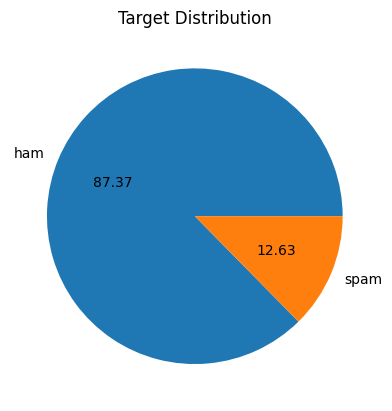

In [20]:
import matplotlib.pyplot as plt
plt.pie(data['Target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.title('Target Distribution')
plt.show()


Data is imbalance.

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
data['num_characters'] = data['Text'].apply(len)

In [24]:
data['num_words'] = data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
data['num_sentences'] = data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
data.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
data[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#for ham messages
data[data['Target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#for spam messages
data[data['Target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

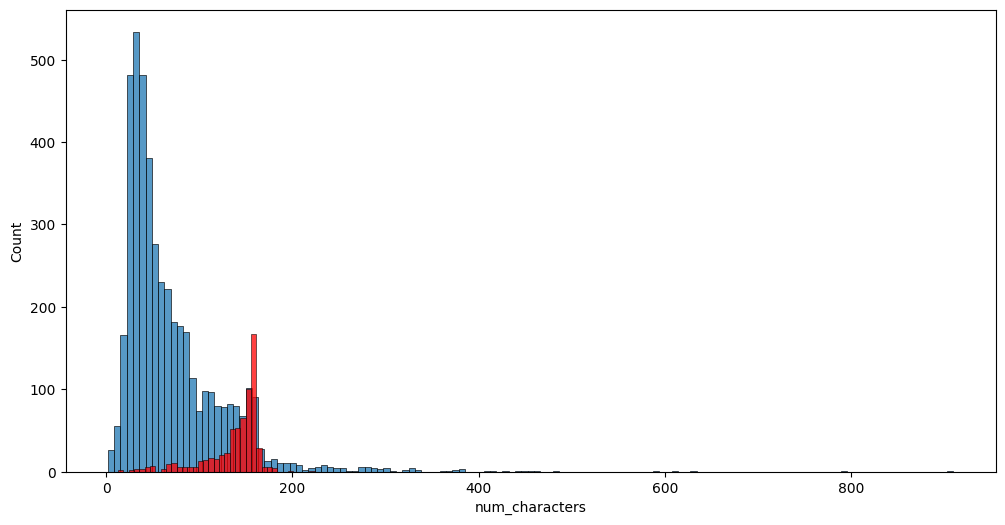

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Target'] == 0]['num_characters'])
sns.histplot(data[data['Target'] == 1]['num_characters'], color='red')

In most of the ham messages number of characters used are less and in most of the spam messages number of characters used are more.

<Axes: xlabel='num_words', ylabel='Count'>

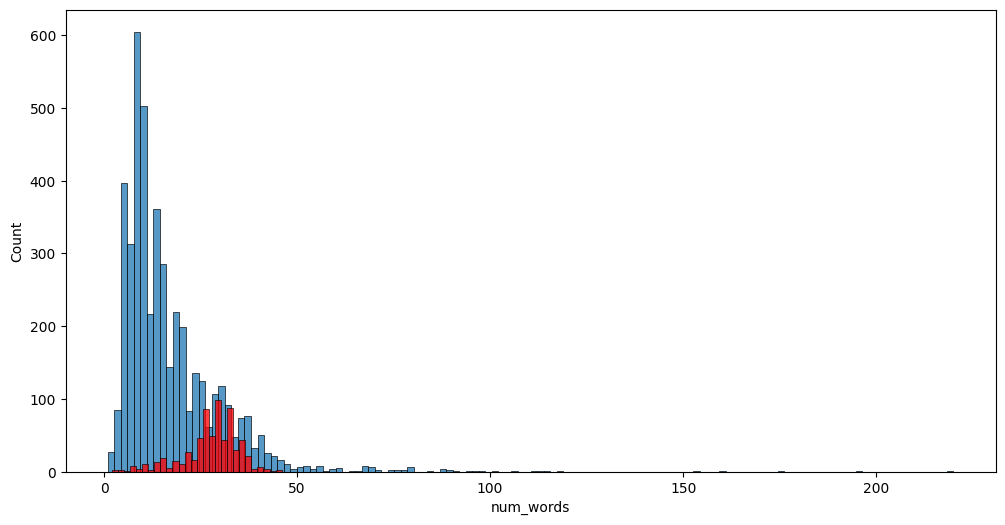

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['Target'] == 0]['num_words'])
sns.histplot(data[data['Target'] == 1]['num_words'], color='red')

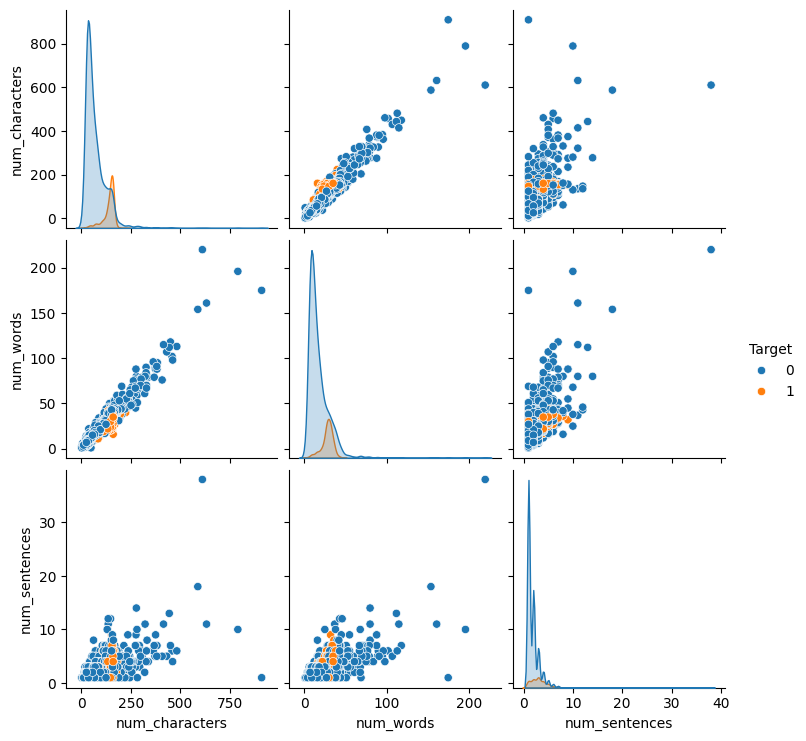

In [33]:
 sns.pairplot(data, hue='Target')


## Data Preprocessing



1.  Lower case
2.  Tokenization
3.  Removing special characters
4.  Removing stop words and punctuation
5.  Stemming



In [34]:

from nltk.stem.porter import PorterStemmer
import string
string.punctuation
ps = PorterStemmer()


In [35]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
       y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [37]:
data.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
data['Text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [39]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [40]:
data['transformed_text'] = data['Text'].apply(transform_text)

In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [42]:
spam_wc = wc.generate(data[data['Target']==1]['transformed_text'].str.cat(sep=" "))

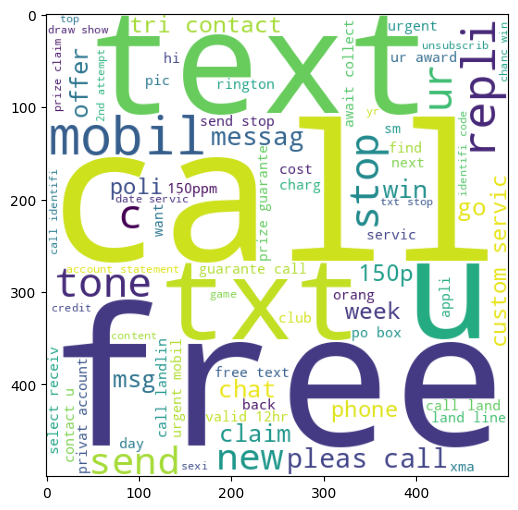

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)  #wordcloud for spam messages

In [44]:
ham_wc = wc.generate(data[data['Target']==0]['transformed_text'].str.cat(sep=" "))

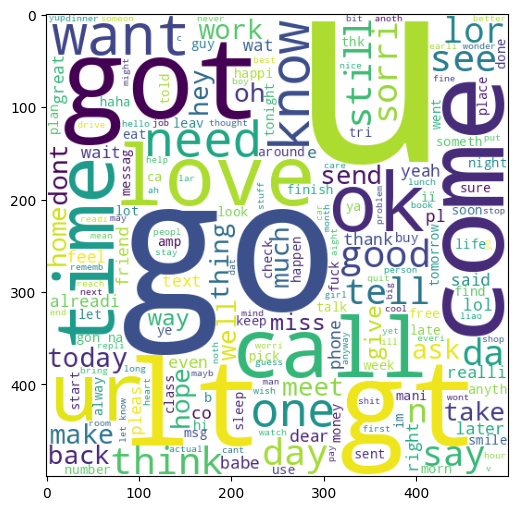

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)  #wordcloud for Ham messages

### Most frequently used words in spam and ham messages.

In [46]:
spam_corpus = []
for msg in data[data['Target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [47]:
len(spam_corpus)

9939

In [48]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


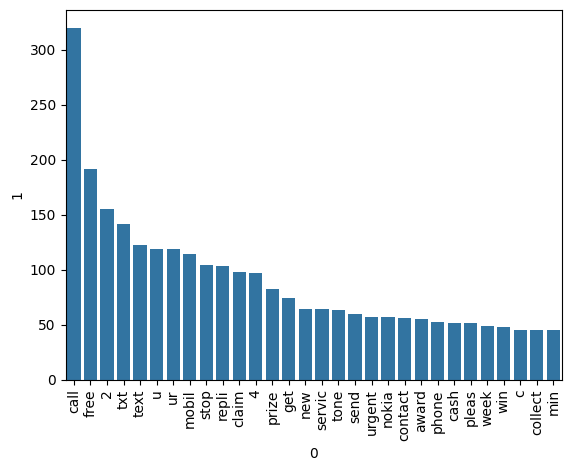

In [49]:
sns.barplot(x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus = []
for msg in data[data['Target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [51]:
len(ham_corpus)

35404

In [52]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


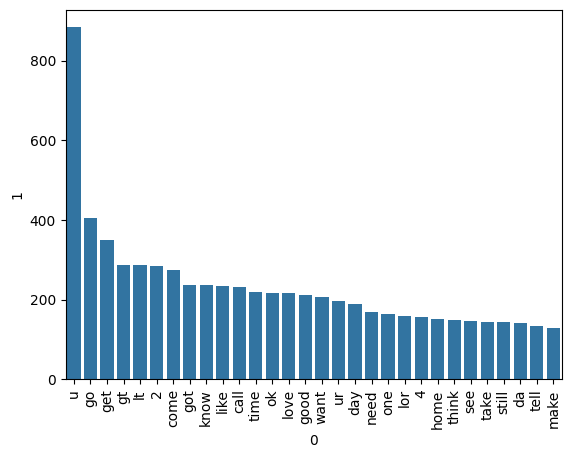

In [53]:
sns.barplot(x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y= pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [55]:
X = cv.fit_transform(data['transformed_text']).toarray()

In [56]:
X.shape

(5169, 6708)

In [57]:
y = data['Target'].values

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [59]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [61]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print("accuracy score :", accuracy_score(y_test, y_pred1))
print("precision_score :",precision_score(y_test, y_pred1))


[[792 104]
 [ 20 118]]
accuracy score : 0.8800773694390716
precision_score : 0.5315315315315315


In [62]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print("accuracy score :", accuracy_score(y_test, y_pred2))
print("precision_score :",precision_score(y_test, y_pred2))

[[871  25]
 [ 12 126]]
accuracy score : 0.9642166344294004
precision_score : 0.8344370860927153


In [63]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print("accuracy score :", accuracy_score(y_test, y_pred3))
print("precision_score :",precision_score(y_test, y_pred3))

[[893   3]
 [ 28 110]]
accuracy score : 0.9700193423597679
precision_score : 0.9734513274336283


we are converting text into vectorization using TfidfVectorizer

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=3000)

In [65]:
X = tv.fit_transform(data['transformed_text']).toarray()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [67]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print("accuracy score :", accuracy_score(y_test, y_pred1))
print("precision_score :",precision_score(y_test, y_pred1))

[[788 108]
 [ 27 111]]
accuracy score : 0.8694390715667312
precision_score : 0.5068493150684932


In [68]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print("accuracy score :", accuracy_score(y_test, y_pred2))
print("precision_score :",precision_score(y_test, y_pred2))

[[896   0]
 [ 30 108]]
accuracy score : 0.9709864603481625
precision_score : 1.0


In [69]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print("accuracy score :", accuracy_score(y_test, y_pred3))
print("precision_score :",precision_score(y_test, y_pred3))

[[895   1]
 [ 16 122]]
accuracy score : 0.9835589941972921
precision_score : 0.991869918699187


In MNB we get best precision score

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [72]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [73]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [74]:
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.9052224371373307, 1.0)

In [75]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [76]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [77]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [78]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [79]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [87]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [88]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [90]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [91]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [93]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [94]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [95]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [96]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [97]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [98]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [100]:
import pickle
pickle.dump(tv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))